In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Trainer

In [2]:
TRAINER_RESULTS = {
    # "MinAtar/DQN": "shapley/minatar_dqn/trainer_shapley_final.csv",
    # "MinAtar/Ordered/DQN[NR]": "shapley/minatar_ordered_dqn/trainer_nowak_radzik_final.csv",
    # "MinAtar/Ordered/DQN[SB]": "shapley/minatar_ordered_dqn/trainer_sanchez_bergantinos_final.csv",
    "ASIPD": { 
        "file": "shapley/sipd_ppo/trainer_shapley_final.csv", 
        "shortens": {
            "SIPD/AlwaysCooperate-Default-v0": "Cooperator",
            "SIPD/AlwaysDefect-Default-v0": "Defector",
            "SIPD/TitForTat-Default-v0": "TitForTat",
            "SIPD/WinStayLoseSwitch-Default-v0": "WinLoseSwicth",
            "SIPD/ExtortionateZD-Default-v0": "ZD-Extortioner", 
        }, 
        "type": "players"
    },
    # # "SparseIPD/Ordered/PPO[NR]": "shapley/sipd_ordered_ppo/trainer_nowak_radzik_final.csv",
    # # "SparseIPD/Ordered/PPO[SB]": "shapley/sipd_ordered_ppo/trainer_sanchez_bergantinos_final.csv"
    "MinAtar": {
        "file": "shapley/minatar_dqn/trainer_shapley_final.csv", 
        "shortens": {
            "MinAtar/Asterix-v0": "Asterix",
            "MinAtar/Breakout-v0": "Breakout",
            "MinAtar/Freeway-v0": "Freeway",
            "MinAtar/Seaquest-v0": "Sequest",
            "MinAtar/SpaceInvaders-v0": "SpaceInvaders"
        }, 
        "type": "games" 
    },
    "MNIST": {
        "file": "shapley/mnist_sgd/trainer_shapley_final.csv", 
        "shortens": {
            "2": "Digit2",
            "3": "Digit3",
            "4": "Digit4",
            "5": "Digit5",
            "7": "Digit7"
        }, 
        "type": "class"
    },
    "CIFAR10": {
        "file": "shapley/cifar10_sgd/trainer_shapley_final.csv", 
        "shortens": {
            "1": "Car",
            "3": "Cat",
            "4": "Deer",
            "5": "Dog",
            "6": "Frog",
            "7": "Horse"
        }, 
        "type": "class"
    }
}

In [3]:
def set_size(width, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

In [4]:
def display_shapley(file: str, title: str, shortens: dict[str, str] = None, player_type: str = ""):
    df = pd.read_csv(
        file,
        index_col=0
    )
    # only against pure eval strategies

    df.index = df.index.map(str)
    all_colum = df['+'.join(df.index)]
    df = df[df.index]
    df['all'] = all_colum
    
    if shortens:
        df = df.rename(columns=shortens, index=shortens)
        
    # plt.figure()
    # display(df)
    with sns.plotting_context("notebook"): 
        plt.figure(figsize=set_size(397.48499))
        hm = sns.heatmap(
            df,
            cmap='Blues', 
            linewidths=0.01, 
            annot=True, 
            fmt='.3f',
            cbar=False,
            vmin=df.min().min(), vmax=df.max().max(),
        )
        hm.set(
            xlabel=r"$\phi_{\bar{\bf{u}}}$", ylabel=r"$\bf{units}$" + f" [{player_type}]", 
            title=r"$\bf{targets}~[\bar{\bf{u}}]$"
        )
        # hm.autoscale(True)
        hm.tick_params(top=True, bottom=False,
                    labeltop=True, labelbottom=False)
        plt.setp(hm.get_xticklabels(), rotation=-15, ha="center",
                    rotation_mode="anchor")
        plt.setp(hm.get_yticklabels(), rotation=0, ha="right",
                    rotation_mode="anchor")
        for idx, _ in enumerate(df.columns):
            plt.gca().axvline(idx, lw=8, color='white')
    plt.savefig(
        os.path.join(os.path.dirname(file), f"{title}.pdf"),
        bbox_inches='tight',
        format='pdf'
    )

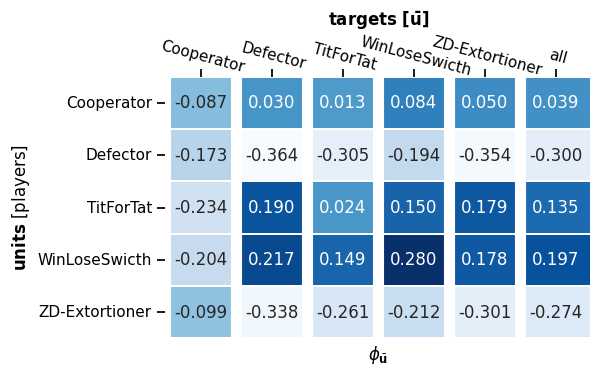

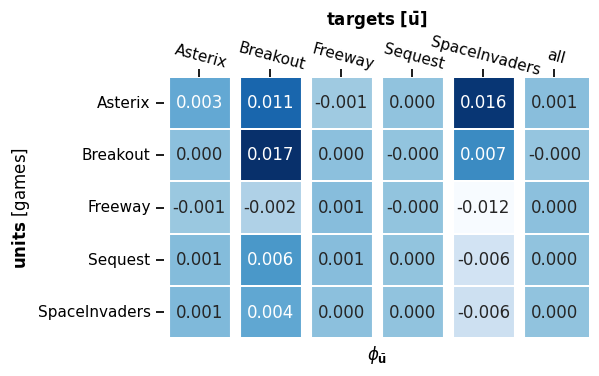

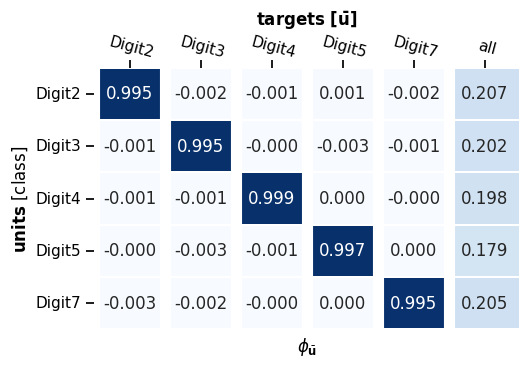

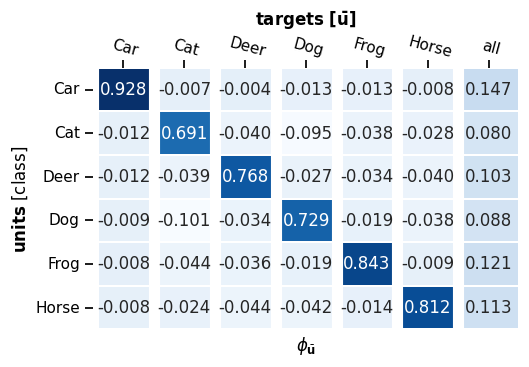

In [5]:
for result in TRAINER_RESULTS:
    display_shapley(
        file=TRAINER_RESULTS[result]['file'], 
        title=result, 
        shortens=TRAINER_RESULTS[result]['shortens'],
        player_type=TRAINER_RESULTS[result]['type']
    )

In [6]:
for result in TRAINER_RESULTS:
    display_shapley(TRAINER_RESULTS[result], result, pure_only=False)

TypeError: display_shapley() got an unexpected keyword argument 'pure_only'

In [ ]:
df = pd.read_csv(
    TRAINER_RESULTS['MNIST/Adam'],
    index_col=0
)
df.head()

,2,2+3,2+3+4,2+3+4+5,2+3+4+5+7,2+3+4+7,2+3+5,2+3+5+7,2+3+7,2+4,...,3+5,3+5+7,3+7,4,4+5,4+5+7,4+7,5,5+7,7
2,0.562573,0.283043,0.191069,0.147913,0.116545,0.142328,0.197190,0.145549,0.187979,0.288062,...,-0.000836,-0.001144,-0.001793,-0.000623,-0.000384,-0.000751,-0.001299,0.000859,-0.000610,-0.001757
3,-0.000785,0.277800,0.187460,0.144436,0.113983,0.139763,0.192623,0.142521,0.184771,-0.000431,...,0.297773,0.193031,0.278337,-0.000136,-0.001218,-0.001132,-0.000185,-0.002050,-0.001433,-0.000527
4,-0.000859,-0.001130,0.183086,0.141407,0.111742,0.136624,-0.000741,-0.000598,-0.000714,0.275427,...,-0.000245,-0.000588,-0.000619,0.565550,0.296235,0.191414,0.276219,0.000273,-0.000237,0.000037
5,-0.000428,-0.001640,-0.001178,0.127549,0.100704,-0.000924,0.170336,0.125965,-0.000960,-0.000566,...,0.262969,0.170486,-0.001348,-0.000563,0.268154,0.173040,-0.000481,0.564247,0.261964,0.000196
7,-0.002587,-0.002569,-0.001699,-0.001425,0.115668,0.141402,-0.001491,0.144519,0.186991,-0.001252,...,-0.000824,0.196655,0.282754,-0.000406,-0.000271,0.199186,0.287356,0.000108,0.301459,0.562612


In [ ]:
df.sum(axis=1)

2    3.562702
3    3.514418
4    3.478816
5    3.243750
7    3.546196
dtype: float64

In [ ]:
df['2+3+4+5+7']

2    0.116545
3    0.113983
4    0.111742
5    0.100704
7    0.115668
Name: 2+3+4+5+7, dtype: float64